Redoing the period fits with everything I've learned from GD394 etc.

In [3]:
#first get the python modules we need
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.convolution import convolve, Box1DKernel
from astropy.table import Table
import astropy.units as u
from astropy.modeling import models, fitting
from astropy.timeseries import LombScargle

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [4]:
wddvs = Table.read('dv_lists/wd_dvs.ecsv')
mddvs = Table.read('dv_lists/bd_dvs.ecsv')

In [5]:
wdt, wdv, wde = np.array(wddvs['MJD'])*24, np.array(wddvs['VELOCITY']), np.array(wddvs['ERROR'])
mdt, mdv, mde = np.array(mddvs['MJD'])*24, np.array(mddvs['VELOCITY']), np.array(mddvs['ERROR'])


Fit the companion first

Nope. Fold on m dwarf period and fit.

Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Sine1D(amplitude=197.37, frequency=0.23667983, phase=0.1)>

    [1]: <Const1D(amplitude=26.92)>
Parameters:
    amplitude_0 frequency_0 phase_0 amplitude_1
    ----------- ----------- ------- -----------
         197.37 0.236679828     0.1       26.92
4.2251171485556425 1.5592138477302337e-05


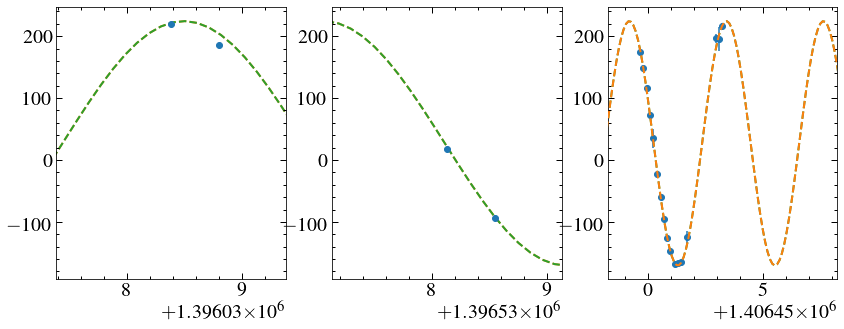

In [14]:
fitter = fitting.LevMarLSQFitter()
sin_mod2 =  models.Sine1D(amplitude=197.37, frequency=0.236679828, phase=0.1)+models.Const1D(26.92)
#sin_mod2 =  models.Sine1D(amplitude=200, frequency=1/4.23)+models.Const1D(30)

sin_mod2.frequency_0.bounds = [0.95*(1/4.23), 1.05*(1/4.23)]
#sin_mod2.amplitude_0.bounds = [0.95*abs(sin_fit[0].amplitude), 1.05*abs(sin_fit[0].amplitude)]
#sin_mod2.amplitude_1.bounds = [0.95*abs(sin_fit[1].amplitude), 1.05*abs(sin_fit[1].amplitude)] 

sin_fit2 = fitter(sin_mod2, mdt, mdv, weights= 1/mde)
fit_e2 = np.sqrt(np.diag(fitter.fit_info['param_cov']))
timefit2 = np.linspace(mdt[0]-10,mdt[-1]+10, 100000)

plt.subplot(131)
plt.errorbar(mdt, mdv, yerr=mde, marker='o', ls='none')
plt.plot(timefit2, sin_fit2(timefit2), ls='--', lw=2, zorder=-5, c='C1')
plt.plot(timefit2, sin_mod2(timefit2), ls='--', lw=2, zorder=-5, c='C2')
plt.xlim(mdt[0]-1, mdt[0]+1)


plt.subplot(132)
plt.errorbar(mdt, mdv, yerr=mde, marker='o', ls='none')
plt.plot(timefit2, sin_fit2(timefit2), ls='--', lw=2, zorder=-5, c='C1')
plt.plot(timefit2, sin_mod2(timefit2), ls='--', lw=2, zorder=-5, c='C2')
plt.xlim(mdt[2]-1, mdt[2]+1)



plt.subplot(133)
plt.errorbar(mdt, mdv, yerr=mde, marker='o', ls='none')
plt.plot(timefit2, sin_fit2(timefit2), ls='--', lw=2, zorder=5, c='C1')
plt.plot(timefit2, sin_mod2(timefit2), ls='--', lw=2, zorder=-5, c='C2')

#plt.plot(mdt, sin_fit2(mdt))
plt.xlim(mdt[-1]-5, mdt[-1]+5)

print(sin_fit2)
print(1/sin_fit2[0].frequency, fit_e2[1]/(sin_fit2[0].frequency**2) )


In [13]:
sin_fit2[0].phase

Parameter('phase', value=0.1)

In [14]:
1/period

0.23667982829158113

In [26]:
1/4.23

0.23640661938534277

In [12]:
fitter.fit_info

{'nfev': 7,
 'fvec': array([ 0.67836236,  7.05187196,  1.6466252 ,  0.3078354 ,  1.01491918,
         0.40284984, -1.6175691 , -1.34480898,  0.09868287,  1.21372351,
        -0.0591507 , -0.8913794 ,  2.59334062,  0.08447529,  1.75957716,
         0.90748483, 16.06080497,  1.31972949,  0.6585104 ,  0.33534296,
        -1.22784454, -0.40429814, -1.04335224, -2.04786602,  0.38582617,
         0.13945955]),
 'fjac': array([[ 1.19296390e+08, -1.03601485e+04,  1.04862734e+01,
         -6.57853423e+00, -3.20392950e-02, -1.05462893e-02,
          2.58814874e-02,  6.24371690e-02,  2.83617223e-02,
          1.88198243e-02,  2.62916567e-02,  2.46114883e-03,
         -1.39020826e-02, -2.55196048e-03, -4.36343972e-02,
         -4.16676082e-02, -9.88936914e-01, -4.80278029e-02,
         -4.90026599e-02, -2.37100698e-02, -3.05921886e-02,
         -2.61233939e-02, -5.52785857e-03,  1.36632477e-02,
          5.41650520e-03,  2.72372471e-02],
        [-1.05154220e+04,  2.37004850e+03, -2.54629567e+00,
